## Problem 2: Create buffers around shopping centers (7 points)

Let’s continue with our case study and calculate a 1.5 km buffer around the geocoded points. 

### a) Load the shopping centre data set (1 point)

First, load the shopping centre *point* data set you created in *problem 1* into a `GeoDataFrame` called `shopping_centres`.

In [6]:
# ADD YOUR OWN CODE HERE
import geopandas as gpd

import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"

shopping_centres = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="shopping_centres")

shopping_centres

,address,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",POINT (25504406.501 6677524.123)
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",POINT (25496591.634 6672925.394)
2,"Musti ja Mirri, 11, Piispansilta, Matinkylä, S...",POINT (25485475.19 6671962.378)
3,"Arnolds, 3-9, Leppävaarankatu, Ruusutorppa, Et...",POINT (25489520.973 6678384.918)
4,"Jumbo, 3, Vantaanportinkatu, Vantaanportti, Pa...",POINT (25498101.692 6686561.206)
5,"5, Hermannin rantatie, Verkkosaari, Kalasatama...",POINT (25498972.729 6674955.946)
6,"HopLop Helsinki, Pasila, 1, Fredikanterassi, K...",POINT (25496158.05 6676151.602)



---

### b) Create a *buffer* around the points (5 points)

Calculate a 1.5 km buffer for each geocoded point. Overwrite the `geometry` column with the new buffer geometry.

Use the [`geopandas.GeoDataFrame.buffer()` method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), that uses shapely’s [`buffer()`](http://toblerity.org/shapely/manual.html#object.buffer) in the background. You only need to care about the `distance` parameter, don’t worry about the possible other arguments.

In [7]:
# ADD YOUR OWN CODE HERE
shopping_centres["geometry"] = shopping_centres.buffer(distance=1500)

In [8]:
shopping_centres

,address,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Musti ja Mirri, 11, Piispansilta, Matinkylä, S...","POLYGON ((25486975.19 6671962.378, 25486967.96..."
3,"Arnolds, 3-9, Leppävaarankatu, Ruusutorppa, Et...","POLYGON ((25491020.973 6678384.918, 25491013.7..."
4,"Jumbo, 3, Vantaanportinkatu, Vantaanportti, Pa...","POLYGON ((25499601.692 6686561.206, 25499594.4..."
5,"5, Hermannin rantatie, Verkkosaari, Kalasatama...","POLYGON ((25500472.729 6674955.946, 25500465.5..."
6,"HopLop Helsinki, Pasila, 1, Fredikanterassi, K...","POLYGON ((25497658.05 6676151.602, 25497650.82..."


In [9]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert shopping_centres.geometry.geom_type.unique() == ["Polygon"]


---

### d) Save buffer geometry layer (1 point)

Save the data frame containing the buffer geometries into a new layer `buffers` inside the same *GeoPackage* `shopping_centres.gpkg`:

In [10]:
# ADD YOUR OWN CODE HERE
shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers", driver="GPKG")

<Axes: >

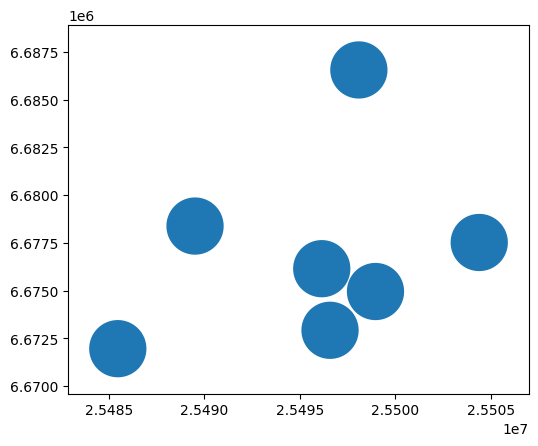

In [11]:
gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers").plot()

In [12]:
shopping_centres.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich